## Intermediate Power Point Tracking

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data1 = pd.read_csv('power_ippt.csv')
data1.head()

,Time,Ipv,Vpv,Vdc,ia,ib,ic,va,vb,vc,Iabc,If,Vabc,Vf,label
0,0.000028,1.572327,101.348877,144.140625,-0.135133,0.490112,-0.354985,41.744537,-149.872894,109.064585,1.000000,50.000000,1.000000,50.000000,F0L
1,0.010027,1.539215,101.251221,143.261719,0.086425,-0.490112,0.349971,-42.311096,149.029083,-108.377482,1.000000,50.000000,1.000000,50.000000,F0L
2,0.020026,1.637604,101.031494,143.554688,-0.155274,0.469971,-0.307988,41.515503,-149.933167,109.104767,1.000000,50.000000,1.000000,50.000000,F0L
3,0.030025,1.577057,101.287842,142.968750,0.106566,-0.456543,0.336543,-42.106171,150.222473,-109.249420,0.461228,49.921509,151.655756,50.078264,F0L
4,0.040024,1.613007,101.049805,143.847656,-0.155274,0.456543,-0.314702,41.370850,-150.162201,109.245402,0.311221,49.594346,154.027080,50.193078,F0L


In [3]:
data1 = data1.dropna()
data1

,Time,Ipv,Vpv,Vdc,ia,ib,ic,va,vb,vc,Iabc,If,Vabc,Vf,label
0,0.000028,1.572327,101.348877,144.140625,-0.135133,0.490112,-0.354985,41.744537,-149.872894,109.064585,1.000000,50.000000,1.000000,50.000000,F0L
1,0.010027,1.539215,101.251221,143.261719,0.086425,-0.490112,0.349971,-42.311096,149.029083,-108.377482,1.000000,50.000000,1.000000,50.000000,F0L
2,0.020026,1.637604,101.031494,143.554688,-0.155274,0.469971,-0.307988,41.515503,-149.933167,109.104767,1.000000,50.000000,1.000000,50.000000,F0L
3,0.030025,1.577057,101.287842,142.968750,0.106566,-0.456543,0.336543,-42.106171,150.222473,-109.249420,0.461228,49.921509,151.655756,50.078264,F0L
4,0.040024,1.613007,101.049805,143.847656,-0.155274,0.456543,-0.314702,41.370850,-150.162201,109.245402,0.311221,49.594346,154.027080,50.193078,F0L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10930,14.358892,1.531647,102.056885,142.675781,0.354979,-0.503540,0.148555,-108.381500,152.585144,-40.760091,0.519110,50.036816,155.672324,49.999645,F7L
10931,14.368891,1.565704,101.104736,143.261719,-0.403687,0.523682,-0.126714,110.756226,-149.559479,43.311615,0.519713,50.087054,155.706972,49.992937,F7L
10932,14.378890,1.501373,101.556396,142.968750,0.361693,-0.530396,0.182124,-108.803406,152.319946,-40.470785,0.522856,50.138598,155.636851,49.996147,F7L
10933,14.388889,1.492859,100.970459,143.847656,-0.396974,0.537109,-0.106572,110.720062,-150.451508,42.560221,0.525012,49.932554,155.571019,50.008771,F7L


In [4]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data1['label'] = label_encoder.fit_transform(data1['label'])
print(data1['label'].unique())

[0 1 2 3 4 5 6 7]


In [5]:
X = data1.drop(columns=['Time', 'label'])
Y = data1['label']

In [6]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold, ShuffleSplit
from sklearn.preprocessing import StandardScaler

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, shuffle=True)
print('X_train ',X_train.shape, 'Y_train ', y_train.shape)
print('X_test ',X_test.shape, 'Y_test ', y_test.shape)

X_train  (7654, 13) Y_train  (7654,)
X_test  (3281, 13) Y_test  (3281,)


In [8]:
import time

In [9]:
scaler = StandardScaler()
X_sc_train = scaler.fit_transform(X_train)
X_sc_test = scaler.transform(X_test)

print('The number of samples in the training set {}'.format(len(X_sc_train)))
print('The number of samples in the test set {}'.format(len(X_sc_test)))

The number of samples in the training set 7654
The number of samples in the test set 3281


In [10]:
def cross_validation(model, X_train, y_train):
    cv = ShuffleSplit(n_splits=5, test_size=0.3)
    scores = cross_val_score(model, X_train, y_train, cv=cv, n_jobs=-1)
    print(scores)
    print('{} Accuaracy with a standard deviation of {}'.format(np.mean(scores), np.std(scores)))

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, roc_auc_score,roc_curve ,auc
def plot_confusion_matrix(y_true, y_pred, model_classes):
    confusion_mat = confusion_matrix(y_true, y_pred)
    normal = confusion_mat.astype('float') / confusion_mat.sum(axis=1)[:, np.newaxis]
    disp = ConfusionMatrixDisplay(confusion_matrix=normal, display_labels=model_classes)
    disp.plot()
    plt.show()

In [45]:
def accuracy_for_each_class(y_true, y_pred, model_classes):
    for label in model_classes:
        if label in y_pred:
            y_test_label = y_true[y_true == label]
            y_pred_label = y_pred[y_true == label]
            accuracy_label = accuracy_score(y_test_label, y_pred_label)
            print('Accuracy fault for {}: {:.3f}'.format(label, accuracy_label))
        else:
            print('Label {} not found in prediction'.format(label))

In [13]:
def plot_roc_curve(y_true, y_scores, model_classes):
    fpt = dict()
    tpr = dict()
    roc_auc = dict()
    
    for i in range(len(model_classes)):
        fpt[i], tpr[i], _ = roc_curve(np.array(pd.get_dummies(y_true))[:,i], y_scores[:,i])
        roc_auc[i] = auc(fpt[i], tpr[i])
    
    plt.figure(figsize=(5,5))
    for i in range(len(model_classes)):
        plt.plot(fpt[i], tpr[i], label='ROC curve (area = %0.2f) for label %s' % (roc_auc[i], model_classes[i]))
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC')
    plt.legend(loc="lower right")
    plt.show()

In [19]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, X_sc_train, y_train):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X_sc_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.figure(figsize=(4, 4))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='k', label='Cross-validation score')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.1, color='k')
    
    plt.xlabel('Training examples')
    plt.ylabel('Score')
    plt.title('Learning Curve')
    plt.legend()
    plt.show()

## DECISION TREE

In [16]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=5, min_samples_leaf= 1,
                                  max_features=None,max_leaf_nodes=None, min_impurity_decrease=0.0)
t1 = time.time()
dt_model.fit(X_sc_train, y_train)
time_model = time.time() - t1
print('Time to training : {0:.5f}'.format(time_model))

Time to training : 0.42407


In [17]:
y_pred_dt = dt_model.predict(X_sc_test)
print(y_pred_dt)

[4 7 4 ... 5 1 2]


In [20]:
print('Training set')
cross_validation(dt_model, X_sc_train, y_train)
print('Test set')
cross_validation(dt_model, X_sc_test, y_test)

Training set
[0.92250762 0.93295603 0.91292991 0.92773182 0.93513278]
0.9262516325642143 Accuaracy with a standard deviation of 0.007968697388696589
Test set
[0.92994924 0.9248731  0.90862944 0.91573604 0.89340102]
0.914517766497462 Accuaracy with a standard deviation of 0.012864190100675847


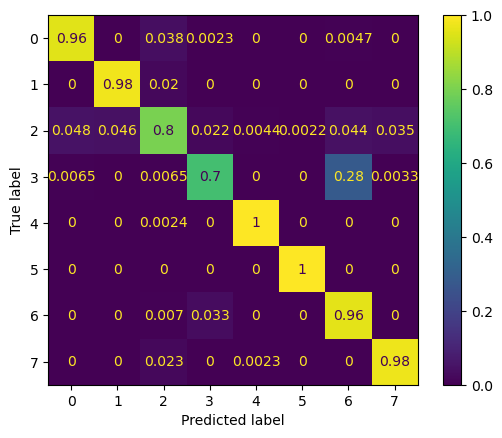

In [21]:
plot_confusion_matrix(y_test, y_pred_dt, dt_model.classes_)

In [46]:
accuracy_for_each_class(y_test, y_pred_dt, dt_model.classes_)

Accuracy fault for 0: 0.955
Accuracy fault for 1: 0.980
Accuracy fault for 2: 0.797
Accuracy fault for 3: 0.699
Accuracy fault for 4: 0.998
Accuracy fault for 5: 1.000
Accuracy fault for 6: 0.960
Accuracy fault for 7: 0.975


In [23]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       426
           1       0.95      0.98      0.96       394
           2       0.90      0.80      0.85       454
           3       0.90      0.70      0.79       306
           4       0.99      1.00      1.00       410
           5       1.00      1.00      1.00       423
           6       0.79      0.96      0.87       427
           7       0.96      0.98      0.97       441

    accuracy                           0.93      3281
   macro avg       0.93      0.92      0.92      3281
weighted avg       0.93      0.93      0.93      3281



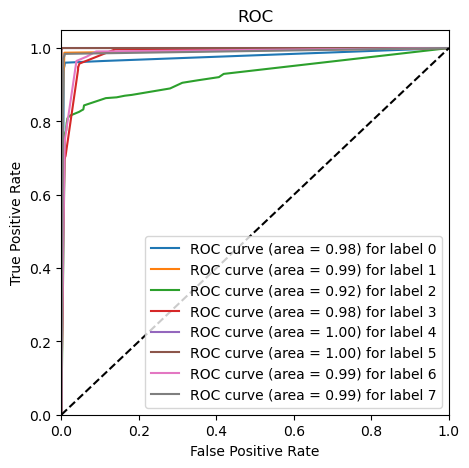

In [24]:
y_score_dt = dt_model.predict_proba(X_sc_test)
auc_roc = roc_auc_score(y_test, y_score_dt, multi_class='ovr')
plot_roc_curve(y_test, y_score_dt, dt_model.classes_)

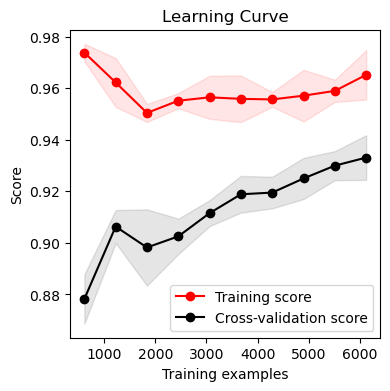

In [25]:
plot_learning_curve(dt_model, X_sc_train, y_train)

## Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
lg_model = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,intercept_scaling=1,
                                  max_iter=100, multi_class='multinomial',n_jobs=1,penalty='l2',random_state=None,solver='lbfgs',
                                  tol=0.001, verbose=0, warm_start=False)
t2 = time.time()
lg_model.fit(X_sc_train, y_train)
lg_time = time.time() - t2
print('Logistic time to training : {0:.5f}'.format(lg_time))

Logistic time to training : 0.40806


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [27]:
y_pred_lg = lg_model.predict(X_sc_test)
print(y_pred_dt)

[4 7 4 ... 5 1 2]


In [28]:
print('Training set')
cross_validation(lg_model, X_sc_train, y_train)
print('Test set')
cross_validation(lg_model, X_sc_test, y_test)

Training set
[0.69046582 0.68872442 0.69830213 0.69786678 0.70918589]
0.6969090117544623 Accuaracy with a standard deviation of 0.0072399186786198935
Test set
[0.6893401  0.6822335  0.67614213 0.67309645 0.68426396]
0.681015228426396 Accuaracy with a standard deviation of 0.0057930325351013634


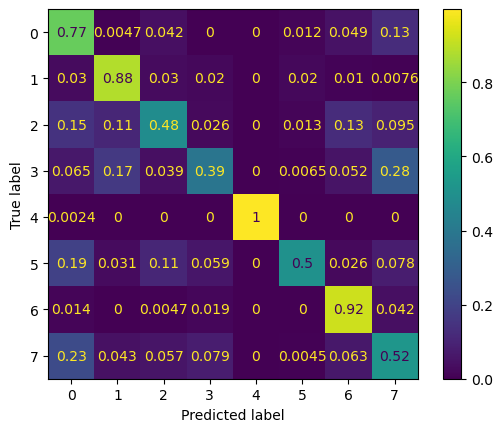

In [29]:
plot_confusion_matrix(y_test, y_pred_lg, lg_model.classes_)

In [47]:
accuracy_for_each_class(y_test, y_pred_lg, lg_model.classes_)

Accuracy fault for 0: 0.765
Accuracy fault for 1: 0.881
Accuracy fault for 2: 0.485
Accuracy fault for 3: 0.389
Accuracy fault for 4: 0.998
Accuracy fault for 5: 0.504
Accuracy fault for 6: 0.920
Accuracy fault for 7: 0.524


In [31]:
print(classification_report(y_test, y_pred_lg))

              precision    recall  f1-score   support

           0       0.53      0.77      0.63       426
           1       0.72      0.88      0.79       394
           2       0.66      0.48      0.56       454
           3       0.57      0.39      0.46       306
           4       1.00      1.00      1.00       410
           5       0.90      0.50      0.65       423
           6       0.74      0.92      0.82       427
           7       0.49      0.52      0.51       441

    accuracy                           0.69      3281
   macro avg       0.70      0.68      0.68      3281
weighted avg       0.70      0.69      0.68      3281



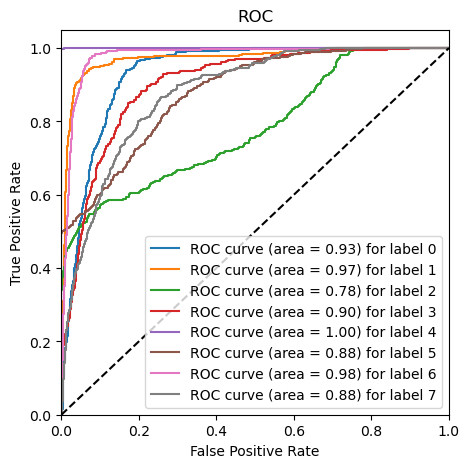

In [32]:
y_score_lg = lg_model.predict_proba(X_sc_test)
auc_roc = roc_auc_score(y_test, y_score_lg, multi_class='ovr')
plot_roc_curve(y_test, y_score_lg, lg_model.classes_)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

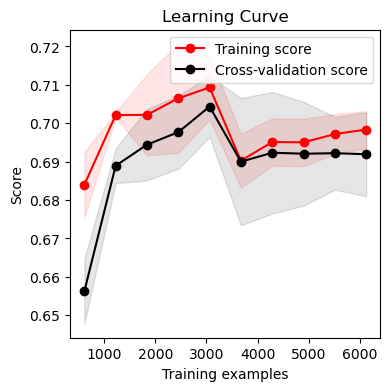

In [33]:
plot_learning_curve(lg_model, X_sc_train, y_train)

## Support Vector Machine

In [34]:
from sklearn.svm import SVC
svm_model = SVC(kernel='rbf', C=1, gamma=0.1, class_weight='balanced',probability=True, decision_function_shape='ovr')
t3 = time.time()
svm_model.fit(X_sc_train, y_train)
svm_time = time.time() - t3
print('SVM time to training : {0:.5f}'.format(svm_time))

SVM time to training : 8.59336


In [35]:
y_pred_svm = svm_model.predict(X_sc_test)
print(y_pred_svm)

[4 7 4 ... 5 1 2]


In [36]:
print('Training set')
cross_validation(svm_model, X_sc_train, y_train)
print('Test set')
cross_validation(svm_model, X_sc_test, y_test)

Training set
[0.93643883 0.94471049 0.94471049 0.94209839 0.93252068]
0.9400957771005659 Accuaracy with a standard deviation of 0.004844728861382165
Test set
[0.92385787 0.92588832 0.90862944 0.91878173 0.92690355]
0.9208121827411168 Accuaracy with a standard deviation of 0.006703583358058569


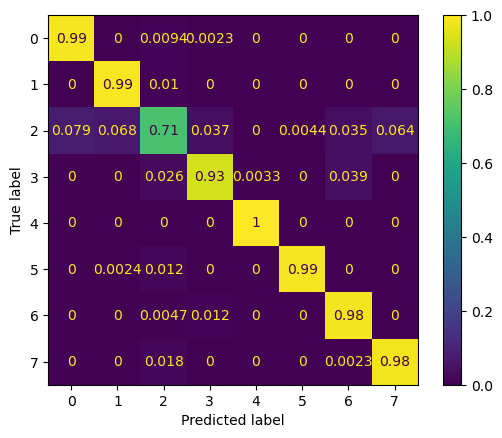

In [37]:
plot_confusion_matrix(y_test, y_pred_svm, svm_model.classes_)

In [48]:
accuracy_for_each_class(y_test, y_pred_svm,svm_model.classes_)

Accuracy fault for 0: 0.988
Accuracy fault for 1: 0.990
Accuracy fault for 2: 0.711
Accuracy fault for 3: 0.931
Accuracy fault for 4: 1.000
Accuracy fault for 5: 0.986
Accuracy fault for 6: 0.984
Accuracy fault for 7: 0.980


In [39]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       426
           1       0.92      0.99      0.96       394
           2       0.91      0.71      0.80       454
           3       0.93      0.93      0.93       306
           4       1.00      1.00      1.00       410
           5       1.00      0.99      0.99       423
           6       0.94      0.98      0.96       427
           7       0.94      0.98      0.96       441

    accuracy                           0.94      3281
   macro avg       0.94      0.95      0.94      3281
weighted avg       0.94      0.94      0.94      3281



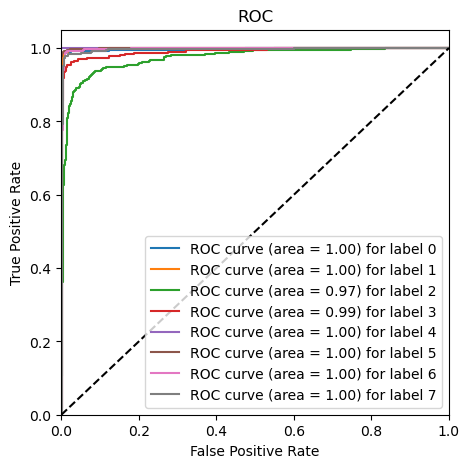

In [40]:
y_score_svm = svm_model.predict_proba(X_sc_test)
auc_roc = roc_auc_score(y_test, y_score_svm, multi_class='ovr')
plot_roc_curve(y_test, y_score_svm, svm_model.classes_)

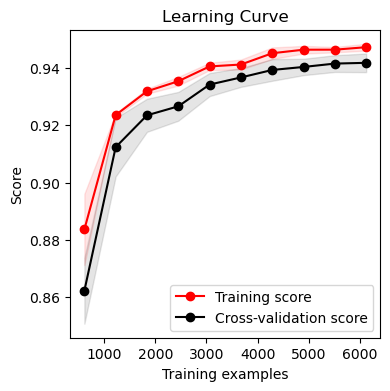

In [41]:
plot_learning_curve(svm_model, X_sc_train, y_train)

In [42]:
pd.DataFrame({'Actual':y_test[:10], 'DecisionTree':y_pred_dt[:10], 'LogisticRegression':y_pred_lg[:10], 'SVM':y_pred_svm[:10]})

,Actual,DecisionTree,LogisticRegression,SVM
5524,4,4,4,4
10834,7,7,0,7
5285,4,4,4,4
3471,2,2,6,2
2482,1,1,1,1
3201,2,6,7,3
6256,4,4,4,4
7352,5,5,5,5
2403,1,1,1,1
390,0,0,0,0


In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Khởi tạo mô hình Random Forest
rf_model = RandomForestClassifier()

# Sử dụng GridSearchCV để tìm ra các giá trị tối ưu của các tham số
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# In ra các tham số tốt nhất và điểm accuracy tương ứng
print("Best parameters found:", grid_search.best_params_)
print("Best accuracy found:", grid_search.best_score_)

# Sử dụng các tham số tốt nhất để xây dựng mô hình cuối cùng
best_rf_model = grid_search.best_estimator_

# Đánh giá mô hình trên tập kiểm tra
test_accuracy = best_rf_model.score(X_test, y_test)
print("Test accuracy:", test_accuracy)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
405 fits failed out of a total of 810.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
405 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\DELL\anaconda3\Lib\site-packages\sk

Best parameters found: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best accuracy found: 0.976744150305452
Test accuracy: 0.977141115513563
